In [1]:
import os
import re

import colorsys
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## reading in images

In [30]:
def get_colors_from_file(fp, downsample=None):
    img = cv2.imread(fp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = img.reshape((img.shape[0] * img.shape[1], 3)) / 255.
    
    if downsample is not None:
        idxs = np.arange(colors.shape[0])
        np.random.shuffle(idxs)
        idxs = idxs[:downsample]
        colors = colors[idxs, :]
    
    return colors, img

## color wheel plotting

In [14]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    try:
        c = mpl.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mpl.colors.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [46]:
def generate_colormap_and_color_matrix(N, H):
    vals = []
    colormap = plt.get_cmap('hsv')
    for i in range(N):
        ls = [lighten_color(colormap(i / N), amount=j / H) for j in range(0, 2 * H, 2)]
        vals.append(np.reshape(ls, (-1,3)))
    
    vals = np.asarray(vals)
    vals[vals < 0.] = 0.
    color_matrix = vals
    vals = vals.reshape((-1, 3))
    pad = np.full((vals.shape[0], 1), 1.)
    vals = np.concatenate((vals, pad), axis=1)

    newcmp = mpl.colors.ListedColormap(vals)

    return newcmp, color_matrix

class ColorSchemePlotter(object):
    def __init__(self, num_colors, num_hues):
        self.N = num_colors
        self.H = num_hues
        self.colormap, self.color_matrix = generate_colormap_and_color_matrix(num_colors, num_hues)
        
    def plot_scheme(self, colors):
        fig, axs = plt.subplots(1, 1, figsize=(10,10),subplot_kw=dict(projection='polar'))

        rad = np.linspace(0, self.H, self.H)
        azm = np.linspace(0, 2 * np.pi, self.N)
        r, th = np.meshgrid(rad, azm)
        z = np.arange(self.N * self.H, dtype=np.float64).reshape((self.N, self.H)) / (self.N* self.H)

        plt.subplot(projection="polar")

        vmin, vmax = (np.min(z), np.max(z))
        cNorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

        plt.pcolormesh(th, r, z, cmap=self.colormap, norm=cNorm)
        
        ts, rs = self.get_points_for_colors(colors)
        plt.scatter(ts, rs, s=2)
        plt.plot(azm, r, ls='none', color='k') 
        plt.tight_layout()
        
        plt.show()
        
    def get_polar_for_color(self, color, color_matrix):
        X = np.sum(np.abs(color_matrix - color), axis=2)
        x, y = np.unravel_index(np.argmin(X, axis=None), X.shape)

        x = (x / self.N) * (2 * np.pi)
        return x, y
        
    def get_points_for_colors(self, colors):
        ts, rs = zip(*[self.get_polar_for_color(c, self.color_matrix) for c in colors])
        return ts, rs


In [47]:
num_colors = 256
num_hues = 256

csp = ColorSchemePlotter(num_colors, num_hues)

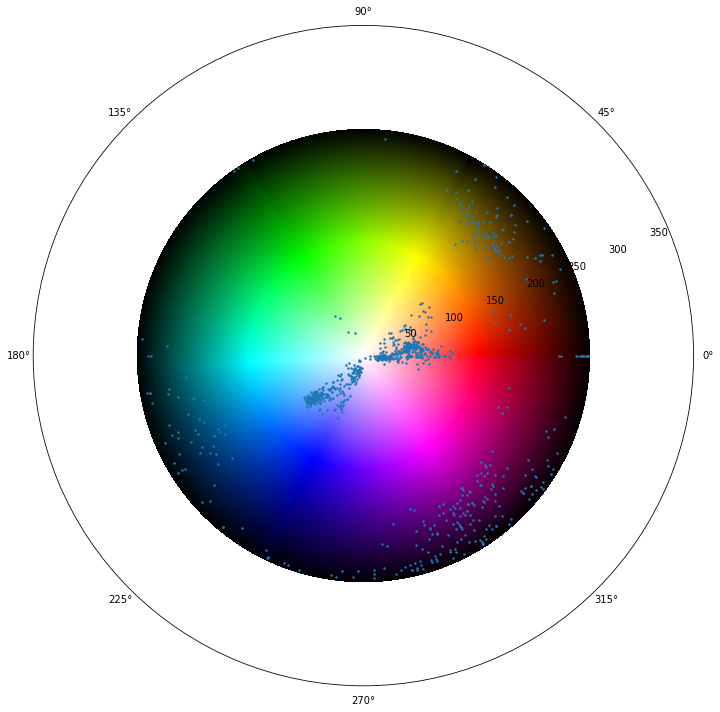

In [78]:
fp = '/Users/estorrs/Downloads/starry_night_full.jpg'
fp = '/Users/estorrs/Downloads/blue_man.jpg'
fp = '/Users/estorrs/Downloads/picasso_primary.jpg'
fp = '/Users/estorrs/Downloads/man.jpeg'
fp = '/Users/estorrs/Downloads/images.jpeg'
fp = '/Users/estorrs/Downloads/picasso_blue_2.jpg'
# fp = '/Users/estorrs/Downloads/vangogh_selfportrait1889complimentary.jpg'
# fp = '/Users/estorrs/Downloads/pepper_diatic.jpg'
# fp = '/Users/estorrs/Downloads/tetradic82848c134c64483c9927605c644914e1.jpg'
fp = '/Users/estorrs/Downloads/claude_bridge.jpeg'
fp = '/Users/estorrs/Downloads/claude_lily.jpeg'
# fp = '/Users/estorrs/Downloads/claude_water.jpeg'
fp = '/Users/estorrs/Downloads/download.jpeg'
fp = '/Users/estorrs/Downloads/jean_b.jpeg'
colors, img = get_colors_from_file(fp, downsample=1000)

csp.plot_scheme(colors)

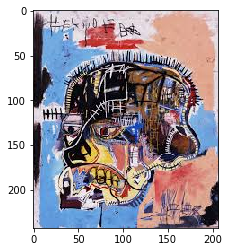

In [79]:
plt.imshow(img)

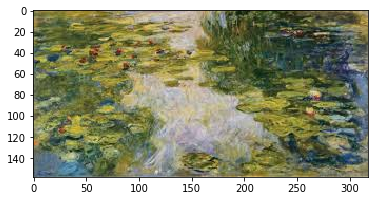

In [75]:
plt.imshow(img)

In [ ]:
# cv2.imshow('img', img)
# plt.show()